## Ludis Sample Report: BYU vs. Gonzaga Postgame 02/22/2020

In [1]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import display, HTML
sns.set()

In [2]:
display(HTML("""
<style>
.output {
    align-items: center;
    text-align: center;
}
</style>
"""))

In [3]:
# Data Import from Ludis s3 repository 
game_data = pd.read_csv("https://ludis-basketball.s3.amazonaws.com/clean-data/post_game_stats_byu_gonzaga.csv")

## BYU Boxscore

In [4]:
byu_stats = game_data[game_data.Team == 'BYU']
byu_stats

,Player,Team,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,Y. ChildsF,BYU,29,4,6,10,3,2,1,1,3,28
1,K. LeeF,BYU,19,0,5,5,1,1,0,0,4,9
2,T. HawsG,BYU,36,0,4,4,8,1,0,2,0,16
3,A. BarcelloG,BYU,28,1,1,2,0,1,0,0,4,3
4,J. ToolsonG,BYU,37,0,3,3,6,4,0,2,3,17
5,G. BaxterF,BYU,8,1,0,1,0,0,0,2,2,4
6,D. NixonF,BYU,0,0,0,0,0,0,0,0,0,0
7,T. MaughanG,BYU,0,0,0,0,0,0,0,0,0,0
8,Z. SeljaasG,BYU,24,1,4,5,2,1,0,1,3,12
9,E. TroyG,BYU,0,0,0,0,0,0,0,0,0,0


## Gonzaga Boxscore

In [5]:
gonzaga = game_data[game_data.Team == 'Gonzaga']
gonzaga

,Player,Team,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
14,K. TillieF,Gonzaga,26,0,3,3,1,1,0,2,5,18
15,F. PetrusevF,Gonzaga,22,0,2,2,1,0,0,4,3,14
16,C. KispertF,Gonzaga,38,2,4,6,1,0,0,0,0,16
17,J. AyayiG,Gonzaga,28,3,5,8,4,1,0,4,3,7
18,R. WoolridgeG,Gonzaga,37,2,5,7,4,3,1,1,0,2
19,D. TimmeF,Gonzaga,17,3,5,8,1,0,1,2,2,8
20,M. ArlauskasG,Gonzaga,0,0,0,0,0,0,0,0,0,0
21,A. GilderG,Gonzaga,32,2,1,3,3,1,1,1,2,13


## BYU vs. Gonzaga Individual Leaders

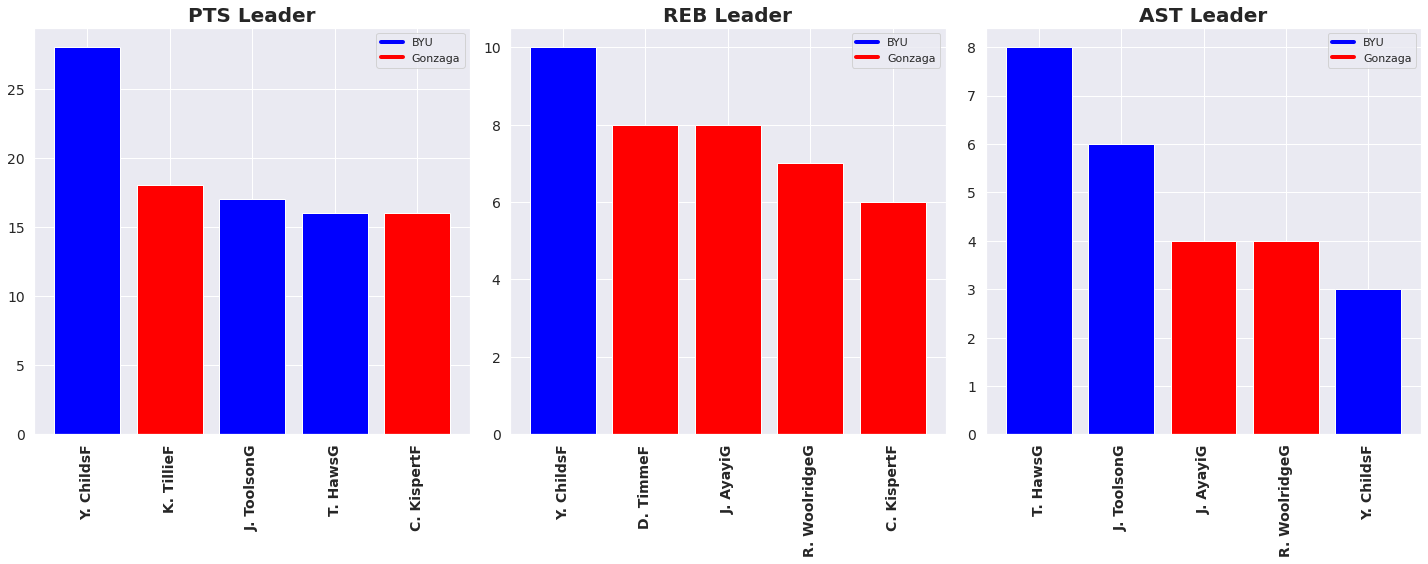

In [6]:
# Plot stat leaders for the game
leader_stats = ['PTS', 'REB', 'AST'] # columns from game_data dataframe to analyze
fig = plt.figure(figsize=(20,8))
for idx, stat in enumerate(leader_stats):
    stat_leaders = game_data.sort_values(by = stat, ascending=False).head(5)
    fig.add_subplot(int('13{}'.format(idx+1)))
    bar_colors = ['red' if team == 'Gonzaga' else 'blue' for team in stat_leaders['Team']]
    plt.bar(x = list(stat_leaders['Player']), height = list(stat_leaders[stat]), color = bar_colors)
    plt.title('{} Leader'.format(stat), size=20, weight = 'bold')
    plt.xticks(fontsize=14, rotation=90, weight = 'bold')
    plt.yticks(fontsize=14)
    
    legend_elements = [Line2D([0], [0], color='blue', lw=4, label='BYU'),
                       Line2D([0], [0], color='red', lw=4, label='Gonzaga')]
    plt.legend(handles=legend_elements, loc='upper right')
    
plt.tight_layout()
plt.show()

## BYU vs. Gonzaga Team Stats

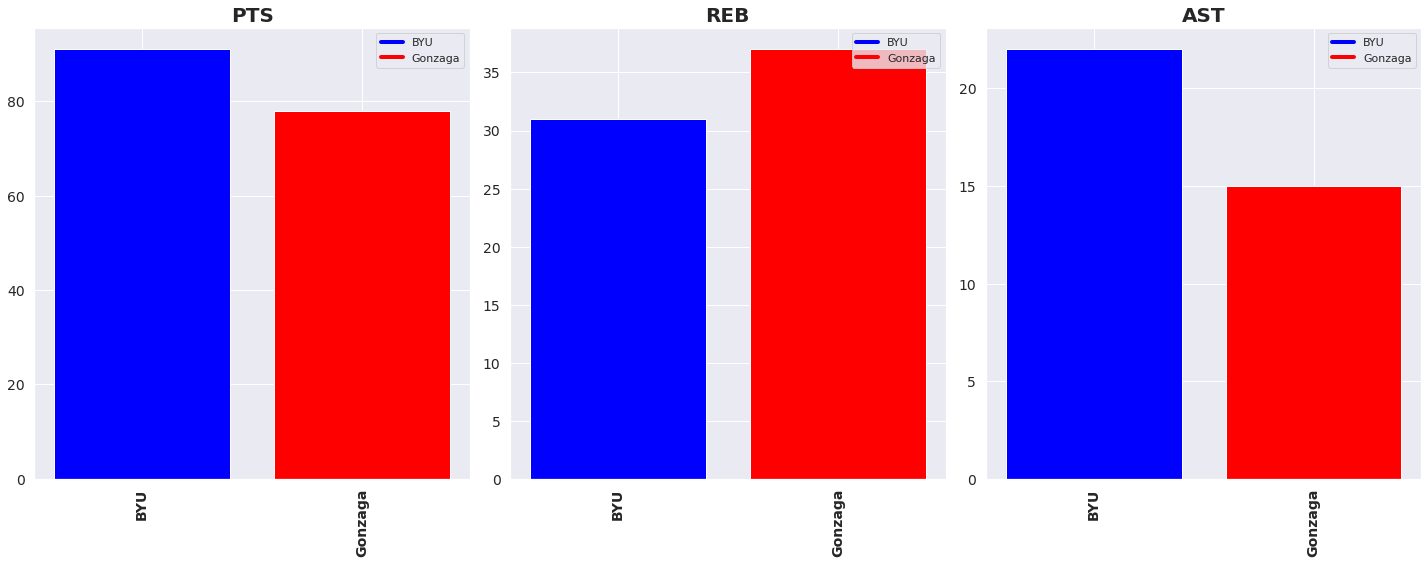

In [7]:
# Plot team leaders for the game
leader_stats = ['PTS', 'REB', 'AST'] # columns from game_data dataframe to analyze
fig = plt.figure(figsize=(20,8))
for idx, stat in enumerate(leader_stats):
    team_stats = game_data.groupby(by = 'Team')[stat].sum()
    fig.add_subplot(int('13{}'.format(idx+1)))
    bar_colors = ['red' if team == 'Gonzaga' else 'blue' for team in team_stats.index]
    plt.bar(x = list(team_stats.index), height = list(team_stats), color = bar_colors)
    plt.title('{}'.format(stat), size=20, weight = 'bold')
    plt.xticks(fontsize=14, rotation=90, weight = 'bold')
    plt.yticks(fontsize=14)
    
    legend_elements = [Line2D([0], [0], color='blue', lw=4, label='BYU'),
                       Line2D([0], [0], color='red', lw=4, label='Gonzaga')]
    plt.legend(handles=legend_elements, loc='upper right')
    
plt.tight_layout()
plt.show()